In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
mu=1.41
m=0.5
a=0.1
niter=int(100/a)
step=1
points=100

c1=m/a
c2=(a*(mu**2))/2



def daction(x1,x,xm1,xp):
    dxn=xp-x
    sxn=xp+x
    sx1=x1+xm1
    
    delta_s=dxn*(sxn*(c1 + c2) -sx1*c1)
    
    return delta_s

def thermalization():
    num_accept=0
    state=3*np.random.random_sample((points,))
    avg_pos=0*np.random.random_sample((niter+1,))
    avg_pos2=0*np.random.random_sample((niter+1,))

    for h in state:
            avg_pos[0]=avg_pos[0]+h
            avg_pos2[0]=avg_pos2[0]+h**2

    for m in range(niter):

        for n in range(points):

            x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
            if n==0:
                delta=daction(state[n+1],state[n],state[points-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass

            elif n==(points-1):
                delta=daction(state[0],state[n],state[n-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass
            else:
                delta=daction(state[n+1],state[n],state[n-1],x_t)

                if  np.exp(-delta) > (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass

        for h in state:
            avg_pos[m+1]=avg_pos[m+1]+h
            avg_pos2[m+1]=avg_pos2[m+1]+h**2

    avg_pos=avg_pos/points
    avg_pos2=avg_pos2/points
    print("Acceptance ratio :", num_accept/(niter*points), "\n The acceptance ratio needs to be around 0.5. \n If it's too low try reducing 'step', and vv if it's too high. ")
    
    
    config=np.arange(niter+1)

    plt.figure(1)
    plt.xlabel('Configuration')
    plt.ylabel('Average distance squared')
    plt.title('Distance squared vs configuration number')
    plt.plot(config, avg_pos2)
    plt.show()
    
    plt.figure(2)
    plt.xlabel('Configuration')
    plt.ylabel('Average distance squared')
    plt.title('Distance squared vs configuration number')
    plt.plot(config, avg_pos2)
    plt.axis([0,400,0,max(avg_pos2)]) ####May need to tune x-axis
    plt.show()

    
    
    




Acceptance ratio : 0.47033 
 The acceptance ratio needs to be around 0.5. 
 If it's too low try reducing 'step', and vv if it's too high. 


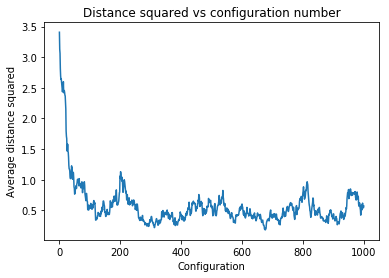

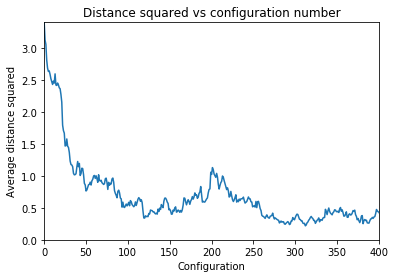

In [91]:
thermalization()

In [ ]:
time=np.arange(niter+1)
print(time.size)
print(avg_pos.size)

plt.figure(1)
plt.xlabel('Configuration')
plt.ylabel('Average Position')
plt.title('Position vs configuration number')
plt.plot(time, avg_pos)
plt.show()

plt.figure(2)
plt.xlabel('Configuration')
plt.ylabel('Average distance squared')
plt.title('Distance squared vs configuration number')
plt.plot(time, avg_pos2)
plt.show()

plt.figure(3)
plt.xlabel('Configuration')
plt.ylabel('Energy')
plt.title('Average energy')
plt.plot(time, (mu**2)*avg_pos2)
plt.show()